In [1]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace


24-08-07 12:42:11 - Directory C:\Users\User/.deepface created
24-08-07 12:42:11 - Directory C:\Users\User/.deepface/weights created


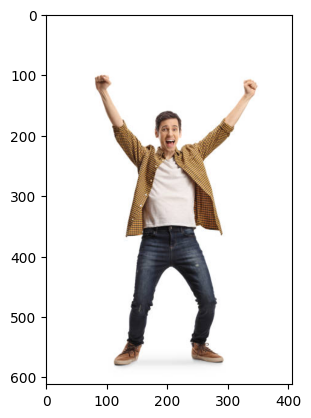

surprise


In [20]:
# Correcting the file path
file_path = r"D:\IntegrationXpert\male & female classification (2)\dataset\non-video\images\image_46.jpg"

# Read the image
img1 = cv2.imread(file_path)

# Check if the image is read correctly
if img1 is None:
    print(f"Failed to load image. Check the file path: {file_path}")
else:
    # Display the image
    plt.imshow(img1[:, :, ::-1])
    plt.show()

    # Analyze the image for emotion
    result = DeepFace.analyze(img1, actions=['emotion'])
    
    # Check if result is a list and access the first element if so
    if isinstance(result, list):
        result = result[0]

    # Extract and print the dominant emotion
    dominant_emotion = result['dominant_emotion']
    print(f"{dominant_emotion}")


1/1 [==============================] - 0s 102ms/step


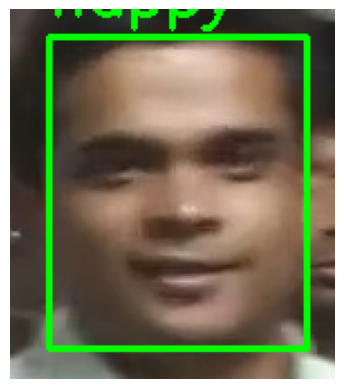

In [89]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Correcting the file path
file_path = r"D:\IntegrationXpert\male & female classification (2)\unique faces\male\video3_1663_418.jpg"
# Read the image
img1 = cv2.imread(file_path)

# Analyze the image for emotion
predictions = DeepFace.analyze(img1, actions=['emotion'])

# Extract the dominant emotion
dominant_emotion = predictions[0]['dominant_emotion']

# Load the MTCNN face detector
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

# Draw rectangles around faces and add the emotion text
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img1, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding boxes and emotion text
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()


In [82]:
from deepface import DeepFace
import cv2
from mtcnn import MTCNN
import os

# Path to the input video
video_path = r"C:\Users\User\Downloads\videos\video4.mp4"

# Path to save the processed video
save_dir = r"D:\IntegrationXpert\emotion detection\testing"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'processed_video.mp4')

# Load the video
cap = cv2.VideoCapture(video_path)

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create a VideoWriter object
out = cv2.VideoWriter(save_path, fourcc, fps, (frame_width, frame_height))

# Load the MTCNN face detector
detector = MTCNN()

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Analyze the frame for emotion
    predictions = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

    # Extract the dominant emotion
    dominant_emotion = predictions[0]['dominant_emotion']

    # Detect faces in the frame
    faces = detector.detect_faces(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Draw rectangles around faces and add the emotion text
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Write the frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Processed video saved to {save_path}")


5/5 [==============================] - 0s 17ms/step
Processed video saved to D:\IntegrationXpert\emotion detection\testing\processed_video.mp4


In [4]:
#live webcam

from deepface import DeepFace
import cv2
from mtcnn import MTCNN
import os
import time

# Path to save the processed video
save_dir = r"D:\IntegrationXpert\emotion detection\testing"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'processed_live_video.mp4')

# Initialize the video capture object for the webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default camera

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create a VideoWriter object
out = cv2.VideoWriter(save_path, fourcc, 15, (frame_width, frame_height))  # Save at 15 fps

# Load the MTCNN face detector
detector = MTCNN()

# Process every nth frame
frame_skip = 0
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    if frame_count % frame_skip == 0:
        start_time = time.time()
        
        # Analyze the frame for emotion
        try:
            predictions = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            dominant_emotion = predictions[0]['dominant_emotion']
        except Exception as e:
            print("Error in emotion detection:", e)
            dominant_emotion = "N/A"

        # Detect faces in the frame
        faces = detector.detect_faces(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Draw rectangles around faces and add the emotion text
        for face in faces:
            x, y, w, h = face['box']
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        
        # Add delay to sync with the actual frame rate
        processing_time = time.time() - start_time
        sleep_time = max(1./fps - processing_time, 0)
        time.sleep(sleep_time)

        # Write the frame to the output video
        out.write(frame)
    
    # Display the resulting frame
    cv2.imshow('Live Video', frame)

    # Increment frame count
    frame_count += 1

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Processed video saved to {save_path}")


1/1 [==============================] - 0s 26ms/step
Processed video saved to D:\IntegrationXpert\emotion detection\testing\processed_live_video.mp4
